In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

This dataset contains 568,454 records of product reviews, capturing user interactions with various products. It includes user and product IDs, review text, helpfulness ratings, review scores, and timestamps. The goal is to analyze sentiment polarity and classify reviews based on their sentiment (positive, negative, or neutral).
Data Cleaning & Preprocessing:
  * Handled Missing Values: Filled or dropped unnecessary columns.
  * Concatenated Columns: Combined relevant text fields where needed.
  * Created Calculated Columns: Generated new features for better insights.
  * Text Preprocessing:
      * Converted text to lowercase.
      * Removed square bracket text, links, punctuation, and words with numbers.
      * Eliminated stop words to enhance model performance.
Sentiment Analysis Approaches Used:
1. TextBlob (Lexicon-Based Approach) – Calculated sentiment polarity.
2. VADER (Lexicon-Based Approach) – Used SentimentIntensityAnalyzer from nltk for sentiment scoring.
3. RoBERTa Pretrained Model (Deep Learning Approach) – Applied advanced transformer-based NLP for sentiment classification.
Machine Learning Models Applied (Scikit-Learn):
  * Logistic Regression, Naïve Bayes, KNN, Decision Tree (with pruning), Gradient Boosting, SVM, Bagging, Boosting, Random Forest, and Neural Networks were implemented.
Visualizations & Insights:
  * Matplotlib was used to generate pie charts, histograms, and other plots to visualize sentiment distributions and review trends.
  Use Cases:
  * Product Sentiment Analysis: Helps businesses understand customer satisfaction.
  * Fake Review Detection: Identifies inconsistencies in helpfulness ratings.
  * Market Research: Assists in understanding consumer opinions on different products.
  * Customer Experience Improvement: Enhances decision-making for e-commerce platforms.
This project provides valuable insights into consumer behavior and helps businesses improve their product offerings and customer engagement strategies. 📊🛒


In [ ]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)


(568454, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

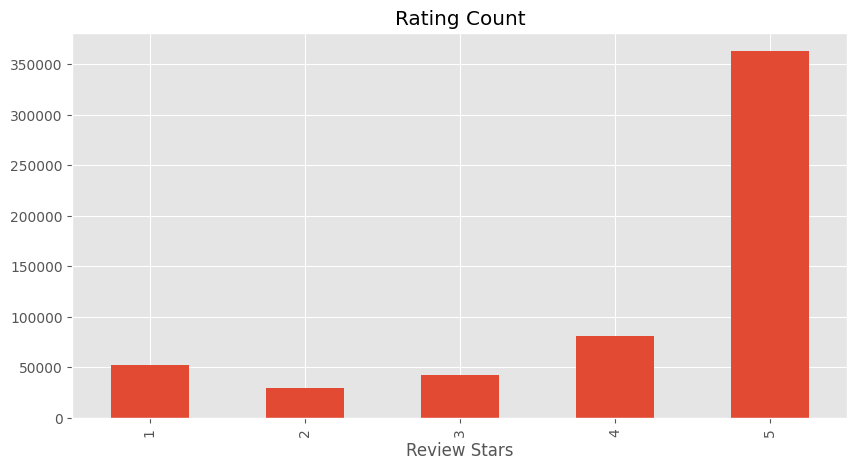

In [ ]:


Score_boxplot = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Rating Count',
          figsize=(10, 5))
Score_boxplot.set_xlabel('Review Stars')
plt.show()

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
#Check for the null values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
#Replacing null values with 'Missing' Text
df['Summary']=df['Summary'].fillna('Missing')

In [ ]:
#dropping unnecassary columns
df=df.drop(['ProfileName','Time'], axis=1)

In [ ]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#concatenating 'Text' column and 'Summary' column
df['reviews']=df['Text']+df['Summary']
df=df.drop(['Text', 'Summary'], axis=1)
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy at a great price. There was a wid...


In [ ]:
#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  new = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
except ZeroDivisionError:
  new=0

#Filling the NaN values(created due to dividing) with 0
new = new.fillna(0)

#Rounding of the results to two decimal places
new=new.round(2)

#Attaching the results to a new column of the main dataframe
df['helpful_rate']=new

#dropping the helpful column from main dataframe
df=df.drop(['HelpfulnessNumerator','HelpfulnessDenominator'], axis=1)

In [ ]:
df.head()

,Id,ProductId,UserId,Score,reviews,helpful_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,2,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy at a great price. There was a wid...,0.0


In [ ]:
df['helpful_rate'].value_counts()

helpful_rate
0.00    303826
1.00    183312
0.50     21623
0.67     10516
0.75      6370
         ...  
0.51         4
0.49         3
1.50         1
3.00         1
0.01         1
Name: count, Length: 103, dtype: int64

0.00 indicates that the review hasn't been much helpful and 1.00 indicates that the review has been very helpful

In [ ]:
#text preprocessing
#Make text lowercase, remove text in square brackets, remove links, remove punctuation, and remove words containing numbers.
import re,string
def review_cleaning(text):

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['reviews']=df['reviews'].apply(lambda x:review_cleaning(x))


In [ ]:
!pip install nltk

In [ ]:
## Removal of Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['reviews'] = df['reviews'].apply(lambda x: remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,ProductId,UserId,Score,reviews,helpful_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,bought several vitality canned dog food produc...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,product arrived labeled jumbo salted peanutsth...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,confection around centuries light pillowy citr...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,2,looking secret ingredient robitussin believe f...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great price wide assortment yummy ...,0.0


#we are checking the polarity using three ways
#1. Textblob - lexicon based approach
#2. VADERS- lexicon based approach
#3. RoBERTa pretrained model- Deep Learning Approach


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df= df.head(10000)
df['polarity'] = df['reviews'].map(lambda text: round(TextBlob(text).sentiment.polarity, 1))

In [ ]:
df.head(20)

,Id,ProductId,UserId,Score,reviews,helpful_rate,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,bought several vitality canned dog food produc...,1.0,0.4
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,product arrived labeled jumbo salted peanutsth...,0.0,0.2
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,confection around centuries light pillowy citr...,1.0,0.2
3,4,B000UA0QIQ,A395BORC6FGVXV,2,looking secret ingredient robitussin believe f...,1.0,0.1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great price wide assortment yummy ...,0.0,0.5
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,4,got wild hair taffy ordered five pound bag taf...,0.0,0.3
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,5,saltwater taffy great flavors soft chewy candy...,0.0,0.2
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,5,taffy good soft chewy flavors amazing would de...,0.0,0.3
8,9,B000E7L2R4,A1MZYO9TZK0BBI,5,right im mostly sprouting cats eat grass love ...,1.0,0.4
9,10,B00171APVA,A21BT40VZCCYT4,5,healthy dog food good digestion also good smal...,0.0,0.4


<Axes: title={'center': 'Sentiment Polarity Distribution'}, xlabel='polarity', ylabel='count'>

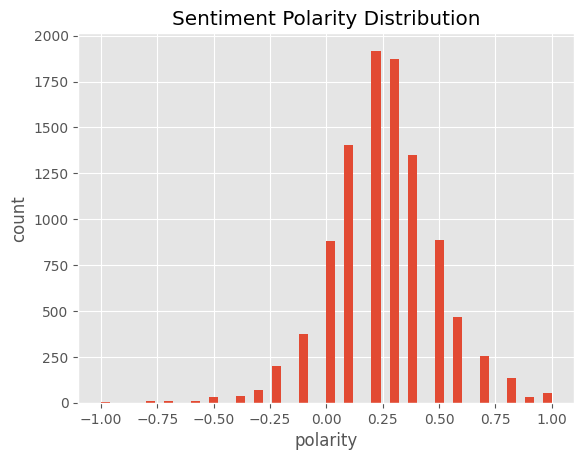

In [ ]:
df['polarity'].plot(
    kind='hist',
    bins=50,
    xlabel='polarity',
    ylabel='count',
    title='Sentiment Polarity Distribution')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            10000 non-null  int64  
 1   ProductId     10000 non-null  object 
 2   UserId        10000 non-null  object 
 3   Score         10000 non-null  int64  
 4   reviews       10000 non-null  object 
 5   helpful_rate  10000 non-null  float64
 6   polarity      10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [ ]:
!pip install sentiment_intensity_analyzer

ERROR: Could not find a version that satisfies the requirement sentiment_intensity_analyzer (from versions: none)
ERROR: No matching distribution found for sentiment_intensity_analyzer


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
res = {}
sia = SentimentIntensityAnalyzer()

for i, row in tqdm(df.iterrows(), total=len(df)):
    reviews = row['reviews']
    Id = row['Id']
    res[Id] = sia.polarity_scores(reviews)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,Score,reviews,helpful_rate,polarity
0,1,0.000,0.556,0.444,0.9413,B001E4KFG0,A3SGXH7AUHU8GW,5,bought several vitality canned dog food produc...,1.0,0.4
1,2,0.123,0.773,0.105,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,1,product arrived labeled jumbo salted peanutsth...,0.0,0.2
2,3,0.124,0.594,0.282,0.8689,B000LQOCH0,ABXLMWJIXXAIN,4,confection around centuries light pillowy citr...,1.0,0.2
3,4,0.000,0.861,0.139,0.4404,B000UA0QIQ,A395BORC6FGVXV,2,looking secret ingredient robitussin believe f...,1.0,0.1
4,5,0.000,0.394,0.606,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great price wide assortment yummy ...,0.0,0.5


<Axes: title={'center': 'Vaders Distribution'}, xlabel='compound', ylabel='count'>

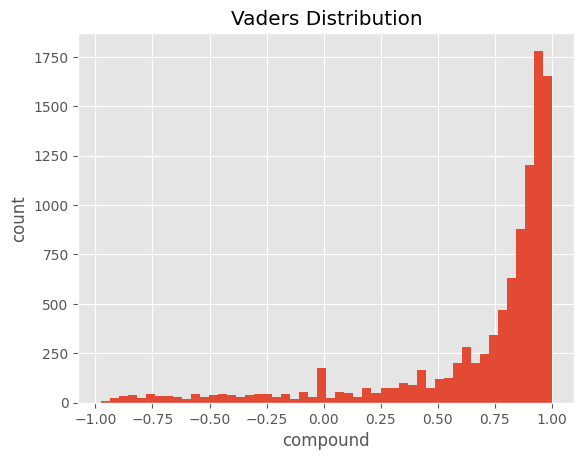

In [ ]:
vaders['compound'].plot(
    kind='hist',
    bins=50,
    xlabel='compound',
    ylabel='count',
    title='Vaders Distribution')

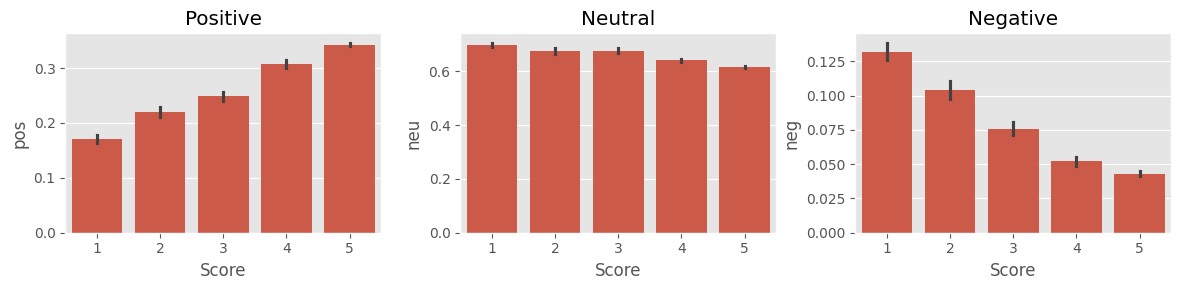

In [ ]:
fig, vaders_barplot = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=vaders_barplot[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=vaders_barplot[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=vaders_barplot[2])
vaders_barplot[0].set_title('Positive')
vaders_barplot[1].set_title('Neutral')
vaders_barplot[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
#3. RoBERTA pretrained model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        reviews = row['reviews']
        Id = row['Id']
        res[Id] = polarity_scores_roberta(reviews)

    except RuntimeError:
        print(f'Broke for id {Id}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 540
Broke for id 1321
Broke for id 1498
Broke for id 2248


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(vaders, how='left')

In [ ]:
results_df.head(5)

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,Score,reviews,helpful_rate,polarity
0,1,0.006572,0.076471,0.916957,0.000,0.556,0.444,0.9413,B001E4KFG0,A3SGXH7AUHU8GW,5,bought several vitality canned dog food produc...,1.0,0.4
1,2,0.096480,0.840758,0.062762,0.123,0.773,0.105,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,1,product arrived labeled jumbo salted peanutsth...,0.0,0.2
2,3,0.004516,0.131411,0.864073,0.124,0.594,0.282,0.8689,B000LQOCH0,ABXLMWJIXXAIN,4,confection around centuries light pillowy citr...,1.0,0.2
3,4,0.006463,0.436181,0.557355,0.000,0.861,0.139,0.4404,B000UA0QIQ,A395BORC6FGVXV,2,looking secret ingredient robitussin believe f...,1.0,0.1
4,5,0.002218,0.013409,0.984374,0.000,0.394,0.606,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great price wide assortment yummy ...,0.0,0.5


NameError: name 'results_df' is not defined

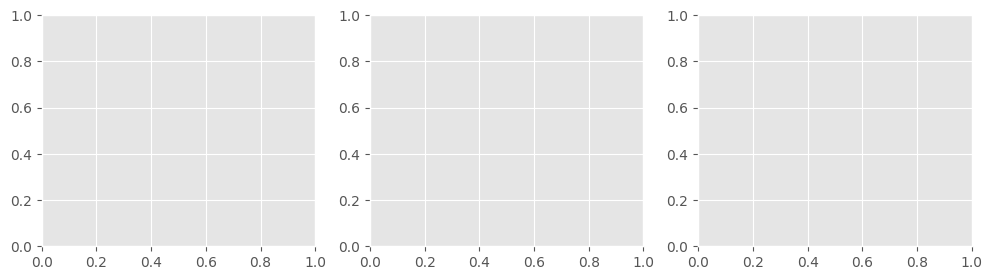

In [ ]:
fig, roberta_barplot = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='Score', y='roberta_pos', ax=vaders_barplot[0])
sns.barplot(data=results_df, x='Score', y='roberta_neu', ax=vaders_barplot[1])
sns.barplot(data=results_df, x='Score', y='roberta_neg', ax=vaders_barplot[2])
roberta_barplot[0].set_title('Positive')
roberta_barplot[1].set_title('Neutral')
roberta_barplot[2].set_title('Negative')
plt.tight_layout()
plt.show()

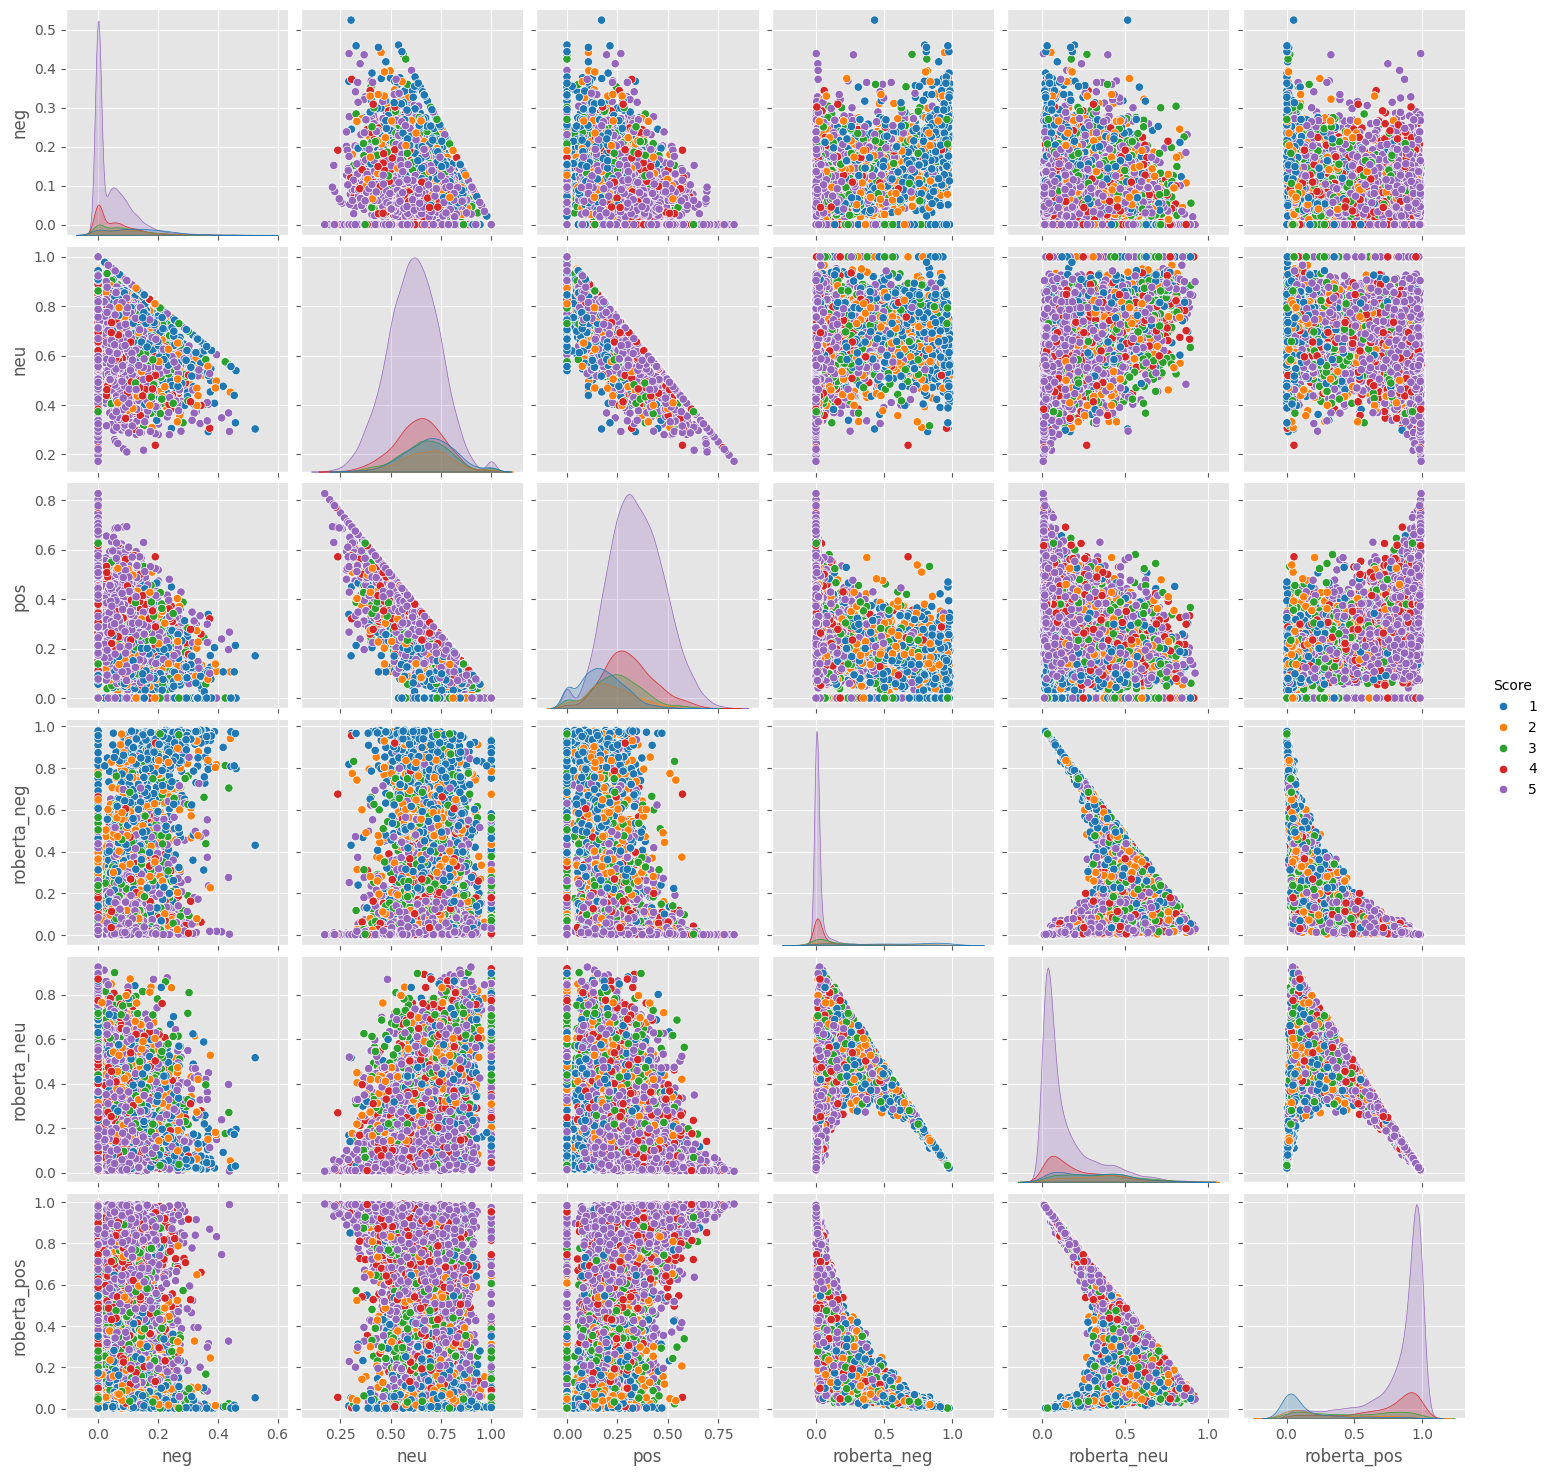

In [ ]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
#This function returns sentiment value based on the overall ratings from the user
def f(row):

    if row['Score'] == 3.0:
        val = 'Neutral'
    elif row['Score'] == 1.0 or row['Score'] == 2.0:
        val = 'Negative'
    elif row['Score'] == 4.0 or row['Score'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)
df.head()

,Id,ProductId,UserId,Score,reviews,helpful_rate,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,bought several vitality canned dog food produc...,1.0,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,product arrived labeled jumbo salted peanutsth...,0.0,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,confection around centuries light pillowy citr...,1.0,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,2,looking secret ingredient robitussin believe f...,1.0,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great price wide assortment yummy ...,0.0,Positive


In [ ]:
# calling the label encoder function
df= df.head(10000)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df['sentiment'].value_counts()

<ipython-input-23-76a415485a86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = le.fit_transform(df['sentiment'])


sentiment
2    7616
0    1522
1     862
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            10000 non-null  int64  
 1   ProductId     10000 non-null  object 
 2   UserId        10000 non-null  object 
 3   Score         10000 non-null  int64  
 4   reviews       10000 non-null  object 
 5   helpful_rate  10000 non-null  float64
 6   sentiment     10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(2,2))
# TF-IDF feature matrix
#X= tfidf_vectorizer.fit_transform(df['reviews'])
# Step 2: Combine your text data with additional features
text_data = df['reviews']
helpful_rate = df['helpful_rate'].values.reshape(-1, 1)  # Reshape to 2D array


# Step 4: Fit and transform the text data
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Step 5: Combine the TF-IDF matrix with additional features
X = hstack((text_tfidf, helpful_rate))


In [ ]:
X.shape

(10000, 1001)

In [ ]:
#Getting the target variable(encoded)
y=df['sentiment']

In [ ]:
#3. Split the data

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

overs = SMOTE()
unders = RandomUnderSampler()
x_train_OS, y_train_OS = overs.fit_resample(train_x, train_y)
x_train_US, y_train_US = unders.fit_resample(train_x, train_y)

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
predclf = clf.predict(valid_x)
DFCLF1 = pd.DataFrame({"Actual": valid_y,
                    "Predicted": predclf .round(2),
                    "Residual": (valid_y - predclf ).round(2)})


print(classification_report(valid_y, predclf))

clf2 = DecisionTreeClassifier()
clf2.fit(x_train_OS, y_train_OS)
predclf2 = clf2.predict(valid_x)
DFCLF2 = pd.DataFrame({"Actual": valid_y,
                    "Predicted": predclf2 .round(2),
                    "Residual": (valid_y - predclf2).round(2)})


print(classification_report(valid_y, predclf2))
clf3 = DecisionTreeClassifier()
clf3.fit(x_train_US, y_train_US)
predclf3 = clf3.predict(valid_x)
DFCLF3 = pd.DataFrame({"Actual": valid_y,
                    "Predicted": predclf3 .round(2),
                    "Residual": (valid_y - predclf3).round(2)})


print(classification_report(valid_y, predclf3))

              precision    recall  f1-score   support

           0       0.37      0.36      0.36       297
           1       0.33      0.23      0.27       178
           2       0.84      0.87      0.85      1525

    accuracy                           0.74      2000
   macro avg       0.51      0.49      0.49      2000
weighted avg       0.72      0.74      0.73      2000

              precision    recall  f1-score   support

           0       0.34      0.37      0.36       297
           1       0.16      0.40      0.22       178
           2       0.86      0.69      0.76      1525

    accuracy                           0.61      2000
   macro avg       0.45      0.48      0.45      2000
weighted avg       0.72      0.61      0.65      2000

              precision    recall  f1-score   support

           0       0.20      0.54      0.29       297
           1       0.17      0.39      0.24       178
           2       0.86      0.44      0.58      1525

    accuracy        

In [ ]:
# Create and fit the logistic regression model
#Original
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial')
LR.fit(train_x, train_y)

# Predictions
predLR = LR.predict(valid_x)

# Classification report
print(classification_report(valid_y, predLR))

              precision    recall  f1-score   support

           0       0.82      0.15      0.26       297
           1       0.71      0.03      0.05       178
           2       0.78      1.00      0.88      1525

    accuracy                           0.79      2000
   macro avg       0.77      0.39      0.40      2000
weighted avg       0.78      0.79      0.71      2000



In [ ]:
#Oversample
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(multi_class='multinomial')
LR2.fit(x_train_OS, y_train_OS)

# Predictions
predLR2 = LR2.predict(valid_x)

# Classification report
print(classification_report(valid_y, predLR2))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49       297
           1       0.26      0.42      0.32       178
           2       0.90      0.78      0.84      1525

    accuracy                           0.72      2000
   macro avg       0.53      0.59      0.55      2000
weighted avg       0.77      0.72      0.74      2000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Undersample
LR3 = LogisticRegression(multi_class='multinomial')
LR3.fit(x_train_US, y_train_US)

# Predictions
predLR3 = LR3.predict(valid_x)

# Classification report
print(classification_report(valid_y, predLR3))

              precision    recall  f1-score   support

           0       0.35      0.52      0.42       297
           1       0.17      0.54      0.26       178
           2       0.89      0.59      0.71      1525

    accuracy                           0.57      2000
   macro avg       0.47      0.55      0.46      2000
weighted avg       0.75      0.57      0.62      2000



In [ ]:
from sklearn.svm import SVC

#original
# Create and fit the SVM model
svm = SVC(kernel='linear')
svm.fit(train_x, train_y)

# Predictions
predsvm = svm.predict(valid_x)

# Classification report
print(classification_report(valid_y, predsvm))


              precision    recall  f1-score   support

           0       0.78      0.29      0.43       297
           1       0.82      0.08      0.14       178
           2       0.81      0.99      0.89      1525

    accuracy                           0.81      2000
   macro avg       0.80      0.45      0.49      2000
weighted avg       0.80      0.81      0.75      2000



In [ ]:
#oversample
# Create and fit the SVM model
svm2 = SVC(kernel='linear')
svm2.fit(x_train_OS, y_train_OS)

# Predictions
predsvm2 = svm2.predict(valid_x)

# Classification report
print(classification_report(valid_y, predsvm2))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48       297
           1       0.23      0.39      0.29       178
           2       0.90      0.73      0.81      1525

    accuracy                           0.68      2000
   macro avg       0.51      0.57      0.52      2000
weighted avg       0.76      0.68      0.71      2000



In [ ]:
#undersample
svm3 = SVC(kernel='linear')
svm3.fit(x_train_US, y_train_US)

# Predictions
predsvm3 = svm3.predict(valid_x)

# Classification report
print(classification_report(valid_y, predsvm3))

              precision    recall  f1-score   support

           0       0.33      0.54      0.41       297
           1       0.17      0.52      0.26       178
           2       0.90      0.58      0.70      1525

    accuracy                           0.57      2000
   macro avg       0.47      0.54      0.46      2000
weighted avg       0.75      0.57      0.62      2000



In [ ]:
#Random Forest original
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF.fit(train_x, train_y)

predRF = RF.predict(valid_x)
print(classification_report(valid_y, predRF))

              precision    recall  f1-score   support

           0       0.77      0.32      0.45       297
           1       0.77      0.17      0.28       178
           2       0.82      0.99      0.90      1525

    accuracy                           0.82      2000
   macro avg       0.79      0.49      0.54      2000
weighted avg       0.81      0.82      0.77      2000



In [ ]:
#RandomForestOverSampled

RF2 = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF2.fit(x_train_OS, y_train_OS)

predRF2 = RF2.predict(valid_x)
print(classification_report(valid_y, predRF2))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42       297
           1       0.34      0.33      0.33       178
           2       0.87      0.86      0.86      1525

    accuracy                           0.75      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.75      0.75      0.75      2000



In [ ]:
#RandomForestUnderSampled

RF3 = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF3.fit(x_train_US, y_train_US)

predRF3 = RF3.predict(valid_x)
print(classification_report(valid_y, predRF3))

              precision    recall  f1-score   support

           0       0.38      0.55      0.45       297
           1       0.24      0.40      0.30       178
           2       0.88      0.74      0.81      1525

    accuracy                           0.68      2000
   macro avg       0.50      0.56      0.52      2000
weighted avg       0.75      0.68      0.71      2000



In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import norm


In [ ]:
train_x = train_x.toarray()
valid_x = valid_x.toarray()




In [ ]:
train_x1 = norm.cdf(train_x)
valid_x1= norm.cdf(valid_x)

In [ ]:
#Original
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(train_x1, train_y)
predNB1 = nb1.predict(valid_x1)
print(classification_report(valid_y,predNB1))

              precision    recall  f1-score   support

           0       0.22      0.35      0.27       297
           1       0.12      0.69      0.20       178
           2       0.91      0.28      0.43      1525

    accuracy                           0.33      2000
   macro avg       0.41      0.44      0.30      2000
weighted avg       0.73      0.33      0.39      2000



In [ ]:
#Oversample
x_train_OS= x_train_OS.toarray()
x_train_OS1= norm.cdf(x_train_OS)
nb2 = GaussianNB()
nb2.fit(x_train_OS1, y_train_OS)
predNB2 = nb2.predict(valid_x1)
NBDF2 = pd.DataFrame({"Actual": valid_y, "Predict": predNB2})
print(classification_report(valid_y,predNB2))

              precision    recall  f1-score   support

           0       0.24      0.37      0.29       297
           1       0.13      0.60      0.21       178
           2       0.88      0.40      0.55      1525

    accuracy                           0.41      2000
   macro avg       0.42      0.46      0.35      2000
weighted avg       0.72      0.41      0.48      2000



In [ ]:
#Undersample
x_train_US=x_train_US.toarray()
x_train_US1= norm.cdf(x_train_US)
nb3 = GaussianNB()
nb3.fit(x_train_US1, y_train_US)
predNB3 = nb3.predict(valid_x1)
NBDF3 = pd.DataFrame({"Actual": valid_y, "Predict": predNB3})
print(classification_report(valid_y,predNB3))

              precision    recall  f1-score   support

           0       0.21      0.67      0.32       297
           1       0.14      0.37      0.20       178
           2       0.89      0.33      0.48      1525

    accuracy                           0.38      2000
   macro avg       0.41      0.46      0.33      2000
weighted avg       0.72      0.38      0.43      2000

